In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
olist_orders_dataset = pd.read_csv("olist_orders_dataset.csv")
olist_order_reviews_dataset = pd.read_csv("olist_order_reviews_dataset.csv")

In [3]:
olist_orders_dataset = olist_orders_dataset.loc[(olist_orders_dataset["order_status"]=="delivered")]
olist_orders_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


# Delivery time 
From the `olist_orders_dataset`, the estimated wait time and actual wait time can be calculated. 

> The actual wait time is calculated as: **ordered_delivered_customer_date** - **order_purchase_timestemp**

Firstly, the values have to be converted into a datetime64 format. 

> The estimated wait time is calculated as: **ordered_estimated_delivery_date** - **order_purchase_timestemp**

Again, the values have to be converted into a datetime64 format. 

In [4]:
time = ["order_purchase_timestamp","order_estimated_delivery_date","order_delivered_customer_date", "order_approved_at"]

In [5]:
for column in time:
    olist_orders_dataset.loc[:, column] = pd.to_datetime(olist_orders_dataset[column])
    
olist_orders_dataset.loc[:,"actual_wait_time"] = (olist_orders_dataset['order_delivered_customer_date']-olist_orders_dataset['order_purchase_timestamp']).dt.days

In [6]:
olist_orders_dataset.loc[:,"estimated_wait_time"] = (olist_orders_dataset['order_estimated_delivery_date']-olist_orders_dataset['order_purchase_timestamp']).dt.days

In [7]:
olist_orders_dataset.loc[:,"payment_wait_time"] = (olist_orders_dataset['order_approved_at']-olist_orders_dataset['order_purchase_timestamp']).dt.days


In [8]:
olist_orders_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,actual_wait_time,estimated_wait_time,payment_wait_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,15,0.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0,19,1.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,26,0.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,26,0.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0,12,0.0


In [9]:
olist_orders_dataset.loc[:,"actualxestimated"] = (olist_orders_dataset['actual_wait_time']-olist_orders_dataset['estimated_wait_time'])


In [10]:
olist_orders_dataset.loc[:,"payment_actual_estimated"] = (olist_orders_dataset['actual_wait_time']-olist_orders_dataset['payment_wait_time']-olist_orders_dataset['estimated_wait_time'])


# Plotting the graphs 
The first graph is the estimated waiting days graph and the second graph is the actual waiting time. 

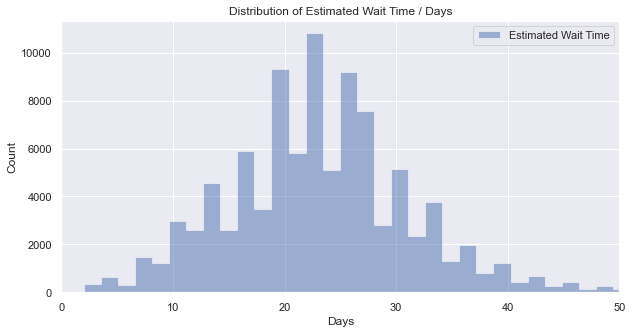

In [11]:
plt.figure(figsize = (10, 5))

kwargs = dict(histtype = 'stepfilled', alpha = 0.5, bins = 100)

plt.hist(olist_orders_dataset['estimated_wait_time'], label='Estimated Wait Time', **kwargs)

plt.title("Distribution of Estimated Wait Time / Days")
plt.xlabel("Days")
plt.ylabel("Count")
plt.xlim((0, 50))
plt.legend()

plt.show()

The histogram above shows the distribution of estimated waiting days throughout all the data points.

With having about 20 estimated waiting days from looking at the highest point in the graph having the most number of points. Majority of the products are in the range of having 10 - 30 estimated waiting days.

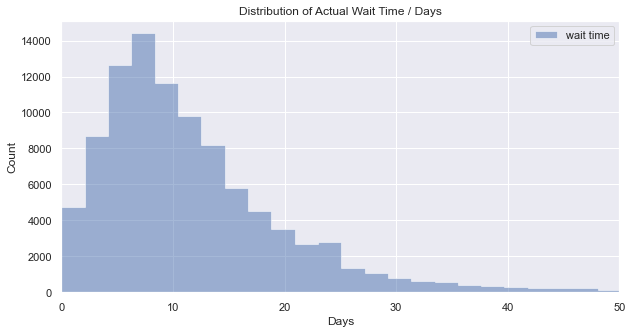

In [12]:
plt.figure(figsize = (10, 5))

kwargs = dict(histtype = 'stepfilled', alpha = 0.5, bins = 100)

plt.hist(olist_orders_dataset['actual_wait_time'], label='wait time', **kwargs)

plt.title("Distribution of Actual Wait Time / Days")
plt.xlabel("Days")
plt.ylabel("Count")
plt.xlim((0, 50))
plt.legend()

plt.show()

The histogram above shows the distribution of actual days waited before customers receives their products. 

There is a significant shift of where majority of the data lies.Majority of the products are in the range of having waited 0 - 20 days. This jump is of a significance difference and the graph is way smoother than the estimated waiting days.

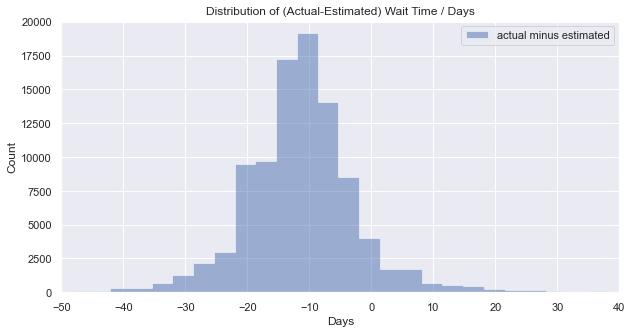

In [13]:
plt.figure(figsize = (10, 5))

kwargs = dict(histtype = 'stepfilled', alpha = 0.5, bins = 100)

plt.hist(olist_orders_dataset['actualxestimated'], label='actual minus estimated', **kwargs)

plt.title("Distribution of (Actual-Estimated) Wait Time / Days")
plt.xlabel("Days")
plt.ylabel("Count")
plt.xlim((-50, 40))
plt.legend()

plt.show()

In [14]:
olist_Merge = olist_orders_dataset.merge(olist_order_reviews_dataset, on="order_id", how = 'left')

In [15]:
olist_Merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97015 entries, 0 to 97014
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       97015 non-null  object        
 1   customer_id                    97015 non-null  object        
 2   order_status                   97015 non-null  object        
 3   order_purchase_timestamp       97015 non-null  datetime64[ns]
 4   order_approved_at              97001 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97013 non-null  object        
 6   order_delivered_customer_date  97007 non-null  datetime64[ns]
 7   order_estimated_delivery_date  97015 non-null  datetime64[ns]
 8   actual_wait_time               97007 non-null  float64       
 9   estimated_wait_time            97015 non-null  int64         
 10  payment_wait_time              97001 non-null  float64       
 11  actualxestimate

In [16]:
duplicate_last = olist_Merge[olist_Merge.duplicated(subset="order_id", keep='last')] 
duplicate_first = olist_Merge[olist_Merge.duplicated(subset="order_id", keep='first')] 

In [17]:
duplicate_last.describe()

,actual_wait_time,estimated_wait_time,payment_wait_time,actualxestimated,payment_actual_estimated,review_score
count,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000
mean,13.256983,25.318436,0.299814,-12.061453,-12.361266,4.078212
std,8.763533,8.762682,0.678467,10.272497,10.351825,1.344360
min,1.000000,4.000000,0.000000,-77.000000,-80.000000,1.000000
25%,7.000000,20.000000,0.000000,-17.000000,-18.000000,4.000000
50%,12.000000,24.000000,0.000000,-12.000000,-12.000000,5.000000
75%,17.000000,30.000000,0.000000,-7.000000,-8.000000,5.000000
max,67.000000,89.000000,5.000000,41.000000,40.000000,5.000000


In [18]:
duplicate_first.describe()

,actual_wait_time,estimated_wait_time,payment_wait_time,actualxestimated,payment_actual_estimated,review_score
count,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000
mean,13.256983,25.318436,0.299814,-12.061453,-12.361266,4.042831
std,8.763533,8.762682,0.678467,10.272497,10.351825,1.361802
min,1.000000,4.000000,0.000000,-77.000000,-80.000000,1.000000
25%,7.000000,20.000000,0.000000,-17.000000,-18.000000,3.000000
50%,12.000000,24.000000,0.000000,-12.000000,-12.000000,5.000000
75%,17.000000,30.000000,0.000000,-7.000000,-8.000000,5.000000
max,67.000000,89.000000,5.000000,41.000000,40.000000,5.000000


In [19]:
olist_Merge.drop_duplicates(subset=["review_score", "order_id"], inplace = True)

In [20]:
olist_Merge = pd.DataFrame(olist_Merge[['order_id','customer_id','review_score','actual_wait_time','estimated_wait_time', 'actualxestimated', 'payment_wait_time', 'payment_actual_estimated']])

In [21]:
olist_Merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96674 entries, 0 to 97014
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   order_id                  96674 non-null  object 
 1   customer_id               96674 non-null  object 
 2   review_score              96674 non-null  int64  
 3   actual_wait_time          96666 non-null  float64
 4   estimated_wait_time       96674 non-null  int64  
 5   actualxestimated          96666 non-null  float64
 6   payment_wait_time         96660 non-null  float64
 7   payment_actual_estimated  96652 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 6.6+ MB


<AxesSubplot:xlabel='review_score', ylabel='actualxestimated'>

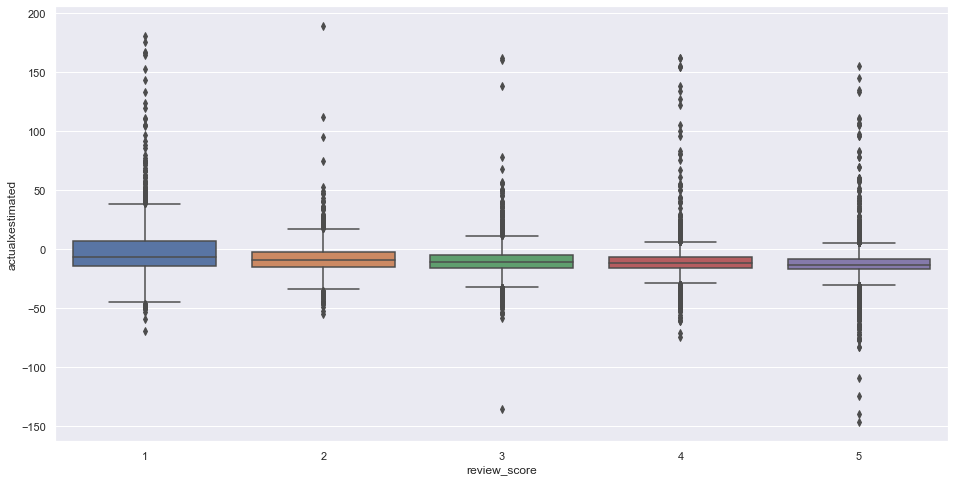

In [22]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'review_score', y = 'actualxestimated', data = olist_Merge)

<AxesSubplot:xlabel='review_score', ylabel='estimated_wait_time'>

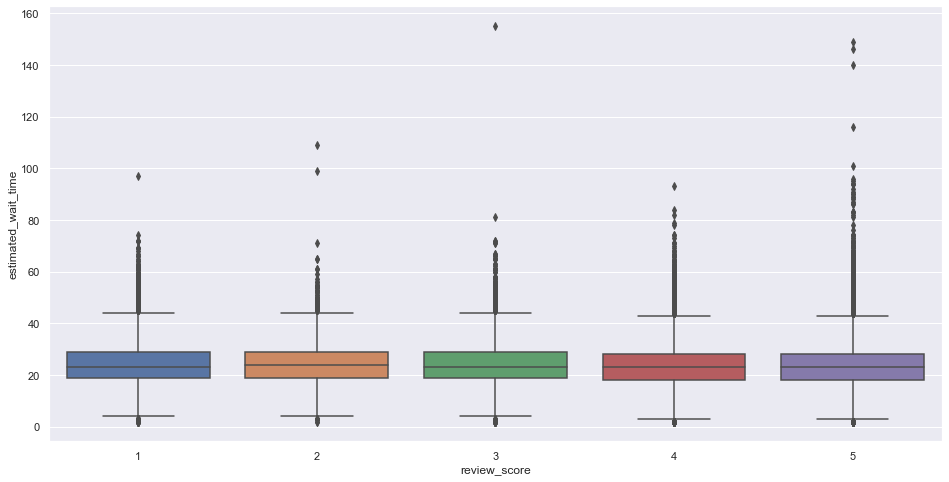

In [23]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'review_score', y = 'estimated_wait_time', data = olist_Merge)

<AxesSubplot:xlabel='review_score', ylabel='actual_wait_time'>

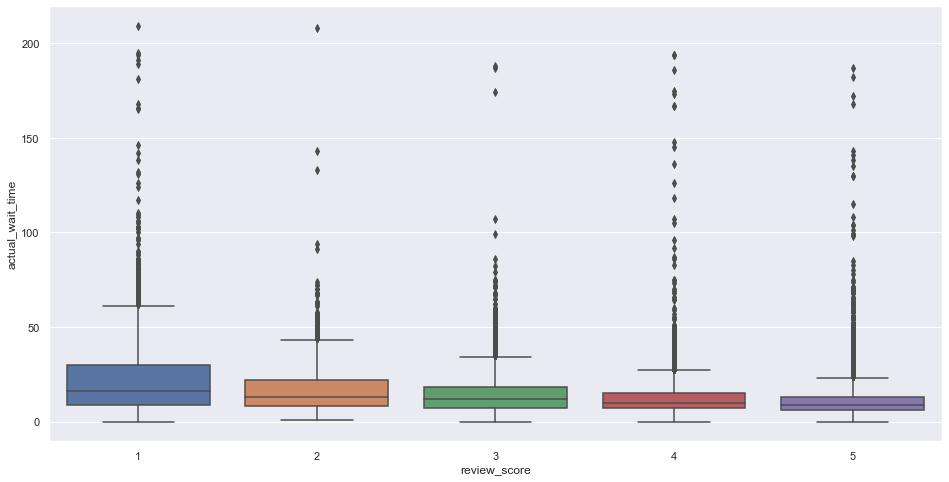

In [24]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'review_score', y = 'actual_wait_time', data = olist_Merge)

The above boxplot is to show the relationship between review scores and wait time. 

We wanted to see if the conventional idea of shorter wait times will equate to customer's satisfaction and in return a good review sccore. We do understand that there are however other factors considered when customers give review scores such as the quality of the product.

From the above boxplot and following the conventional idea, this would mean that there would be a range for the review score 5 if the wait time is closer to 0 days.

True enough for the review score 5, compared to the other review scores.Their range of datapoints are closest to 0. However so, the distribution of data points are evenly distributed hence the correlation between review scores and wait time is not strong.

Other factors could be of greater influence to giving a high review score.

<AxesSubplot:>

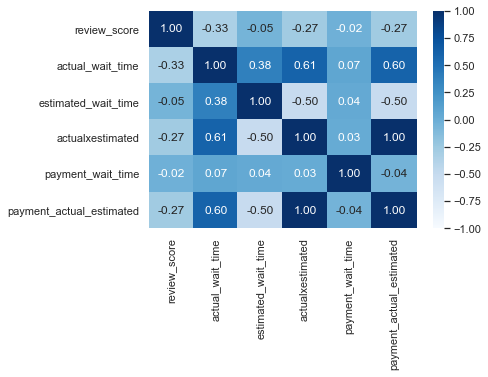

In [25]:
sb.heatmap(olist_Merge.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f", cmap ="Blues")

<AxesSubplot:xlabel='review_score', ylabel='estimated_wait_time'>

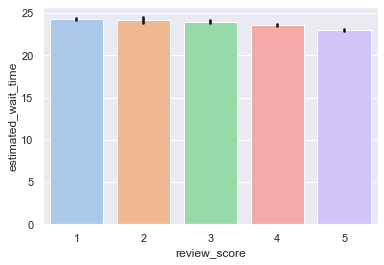

In [43]:
sb.barplot(x='review_score', y='estimated_wait_time', data=olist_Merge, palette ="pastel" , errcolor='k')

<AxesSubplot:xlabel='review_score', ylabel='payment_actual_estimated'>

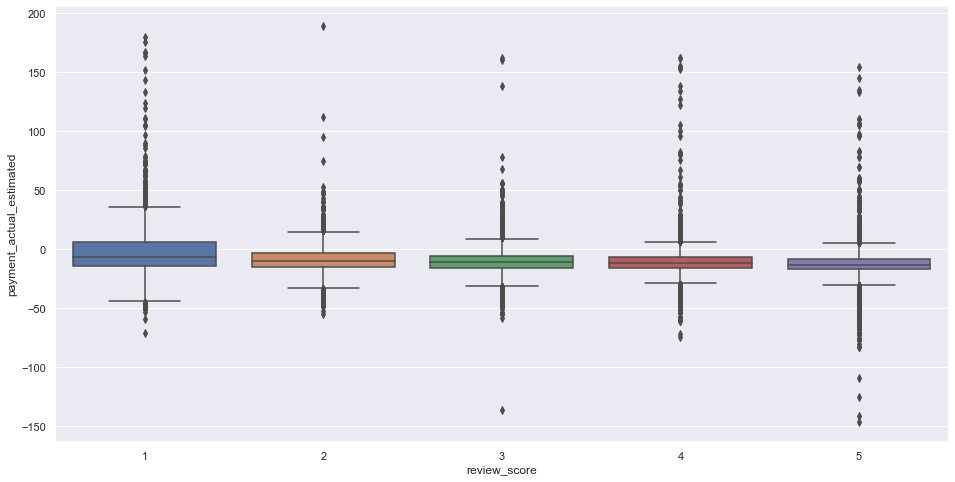

In [27]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'review_score', y = 'payment_actual_estimated', data = olist_Merge)